In [ ]:
#LIBRERIAS 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# **Tarea 1**

**Parte a)**

In [ ]:
class PerceptronSimple():
    def __init__(self, a, n_inter):
        self.a = a # taza de aprendizaje
        self.n_inter = n_inter #número de iteraciones 
        
    def train(self, X, y):    
        # en la lista w voy a guardar los valores de los pesos 

        self.w = np.zeros(1 + X.shape[1]) # tengo 1 + la cantidad de valores de entrada
                                          # seria 1 neurona por cada valor mas el bias  

        # en la lista error_list guardo el valor de los errores
        self.error_list = []
        
        for i in range(self.n_inter): 
            error = 0
            for xi, Y in zip(X, y): # X es el valor inicial e y el target
                rate = self.a * (Y - self.predict(xi)) 
                self.w[1:] += rate * xi #actualización de los pesos
                self.w[0] += rate #actualización del bias
                error += int(rate != 0.0) # actualización del error
            self.error_list.append(error) # lo agrego a la lista que defini previamente
        return self
    
    def predict(self, X):
        #Función de predicción, utilizo una función escalón
        # Donde la función retorna 1 si el valor es mayor o igual que cero 
        # Y retorna 0 en el caso contrario
            yd = np.where(self.sum_pon(X) >= 0.0, 1, 0)
            return yd
    def sum_pon(self, X):
        #Aqui realizo la operación de matrices
        #Realizo el producto de la matriz que contiene los valores iniciales X
        #Con la matriz que contiene los pesos, estos valores estan ubicados en la
        #Posición [1:] del array w
        #Por último a la matriz resultante le sumo el valor de bias ubicado en la
        #posición [0] de w

        z = np.dot(X, self.w[1:]) + self.w[0]
        return z
        
# El percetron solo devuelve valores de (0, 1) para las puertas logicas
#Si se desea obtener otros valores binario como (-1, 1) se usa esta funcion
def predict_general(ppn, x, categoria):
    sol = [] # Aqui guardo los datos de la salida
    rango = ppn.predict(x).shape[0] #el rango es el cantidad de elementos en la predicción 
    for i in range(rango):
        if ppn.predict(x)[i] == 0: 
            sol.append(min(categoria)) # Si el valor es cero, se coloca el valor mínimo del nuevo intervalo dado
        else:
            sol.append(max(categoria)) #Aqui sucede lo mismo pero con el valor máximo del intervalo dado
            #De esta forma la salida estará entre [min, max] del intervalo dado
    return sol

        #Funcion para graficar el error de cada iteracion
def error_plot(error):
    plt.plot(range(1, len(error) + 1), error, marker = 'o')
    plt.xlabel('Epoca')
    plt.ylabel('Número de actualizaciones')

    plt.tight_layout()
    plt.show()        

    #Funcion para graficar la recta que predice el percetron

def lineplot(w):
    x = np.linspace(0,1,10)
    y = w[0]/w[2] - w[1]/w[2]*(x)

    plt.plot(x, y)
    plt.show()    

**Compuerta lógica and**

[0 0 0 1]
Valores de salida: -1 y 1
[-1, -1, -1, 1]


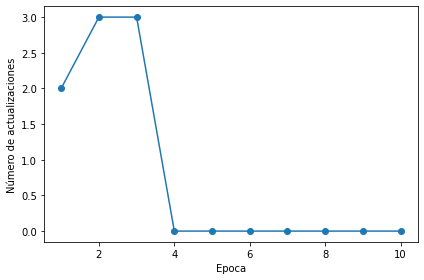

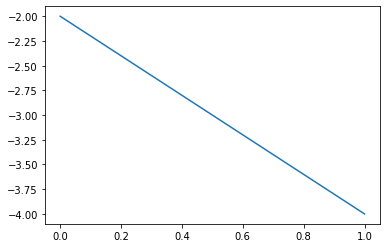

In [ ]:
#Valores de x
x_and = np.array([[0,0],
     [0,1],
     [1,0],
     [1,1]])
#Valores de y, este es el target
y_and = np.array([[0],
              [0],
              [0],
              [1]])

#creo el objeto ppn_and usando la clase PerceptronSimple 
#Con una taza de aprendizaje de 0.4 y con 10 iteraciones

ppn_and = PerceptronSimple(0.4, 10)
ppn_and.train(x_and, y_and) #Entreno la red para ajustar los valores de w y b

print(ppn_and.predict(x_and))

#Si quiero que la salida sea -1 y 1 en vez de 0 y 1 utilizo la función predict_general
print('Valores de salida: -1 y 1')
print(predict_general(ppn_and, x_and, [-1,1]))

error_plot(ppn_and.error_list)
lineplot(ppn_and.w)

**Compuerta lógica or**

[0 1 1 1]
Valores de salida: -1 y 1
[-1, 1, 1, 1]


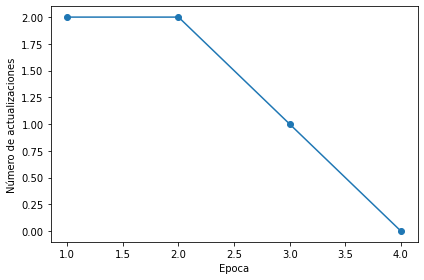

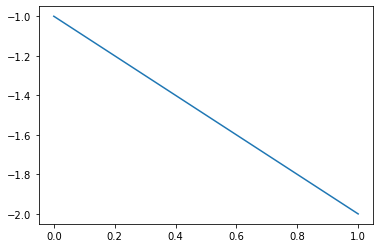

In [ ]:
#Valores de x
x_or = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])

#Valores de y, el target
y_or = np.array([[0],
                 [1],
                 [1],
                 [1]])

#Creo el objeto con la clase PerceptronSimple
ppn_or = PerceptronSimple(0.4, 4) #Defino una taza de aprendizaje de 0.4 con 4 iteraciones
ppn_or.train(x_or, y_or)

print(ppn_or.predict(x_or))
#Si quiero que la salida sea -1 y 1 en vez de 0 y 1 utilizo la función predict_general
print('Valores de salida: -1 y 1')
print(predict_general(ppn_or, x_or, [-1,1]))

error_plot(ppn_or.error_list)
lineplot(ppn_or.w)

Para resolver la compuerta lógica de nor y xor no puedo usar la clase de percetrón simple, porque no puede separar los valores de 0 y 1 usando 4 nuerona de entrada y una de salida. En este caso debo agregarle una capa oculta a la red neuronal 

In [ ]:
class Perceptron():
    def __init__(self, entrada, oculta, salida):
        self.entrada = entrada #neuronas de entrada
        self.oculta = oculta # capa oculta
        self.salida = salida # salida de la red neuronal
        self.w1 = np.random.randn(entrada, oculta) # creo un array con valores
                                                   # aleatorio para los pesos de paso entre la entrada de la red a la capa oculta 

        self.w2 = np.random.randn(oculta, salida) # creo un array con valores aletorios
                                                   # para los pesos entre la capa oculta a la salida de la red
#Esta es la función forward de la red
    def forward(self, X):
        self.z1 = X @ self.w1 # hago el producto entra la matriz de la capa de entrada con los pesos entre esta capa a y la capa oculta
        self.a1 = self.sigm(self.z1) #Pasa el valor por la función de activación

          #Realizo lo mismo para los valores de la capa oculta a la capa de salida
        self.z2 = self.a1 @ self.w2 
        self.out = self.sigm(self.z2) # Aquí defino la salida de la red
        
        return self.out #retorno la salidad de la red

#Función de backpropagation
    def backpropa(self, X, Y, alpha):
        out = self.forward(X) # Guardo la salida de la red en variable out
      
      #Ahora realizo los calculos del backpropagation, para poder ajustar los valores de los pesos

        error_out = (out - Y) * self.sigm_prime(out)  #error de la salida
        w2_prime = self.a1.T @ error_out #error respecto al peso de la capa oculta a la capa de salida

        error_oculta = (error_out @ self.w2.T) * self.sigm_prime(self.a1) #error de la capa oculta
        w1_prime = X.T @ error_oculta # error respecto al peso de la capa de entrada a la capa oculta

        #Descenso del gradiente
        self.w1 -= w1_prime * alpha #actualizo los valores de w1
        self.w2 -= w2_prime * alpha #actualizo los valores de w2
        
        return self.mse(out, Y) #Retorno el error cuadratico medio 

    def mse(self, yp, Y):
        #Función de error cuadratico medio
        return np.mean((yp - Y)**2) / 2

        #Función sigmoide, esta función será mi función de activación
    def sigm(self, x):
        return  1 / (1 + np.exp(-x))

        #Derivada de la función sigmoide para el backpropagation      
    def sigm_prime(self, x):
        return x * (1 - x)
    '''
    def error_plot(self, net, precision = 0.01):
        self.errors = []
        self.error_ = 1

        while self.error_ > precision:
            self.error_ = self.backpropa(X, Y, alpha)
            self.errors.append(error_)

        self.x_axis = range(0, len(self.error_list))

        plt.plot(self.x_axis, self.error_list)
        plt.show()
    '''
    def predict(self, X, y, alpha, n_iter):
        for i in range(n_iter):
            self.backpropa(X, y, alpha)
        salida = np.round(self.forward(X))
        return salida

Compuerta lógica xor

In [ ]:
#Valores de x
x_xor = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
#Valores de y
y_xor = np.array([[0],
                  [1],
                  [1],
                  [0]])   

#Creo el objeto ppn_xor usando la clase Perceptron
ppn_xor = Perceptron(3, 3, 1) # defino 3 neuronas de entrada, 3 en la capa oculta y una en la salida
ppn_xor.predict(x_xor, y_xor, 0.5, 1000)

ppn_xor.entrada

3

Compuerta lógica nor

In [ ]:
#Valores de x
x_not = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
#Valores de y
y_not = np.array([[0],
                  [0],
                  [1],
                  [1]])  
#Creo el objeto con la clase Perceptron
ppn_not = Perceptron(3, 5, 1) # defino 3 neuronas de entrada, 5 en la capa oculta y una de salida
ppn_not.predict(x_not, y_not, 0.5, 1000)

array([[0.],
       [0.],
       [1.],
       [1.]])

**Parte b)**

In [ ]:
class red_neuronal(): # Clase que calcula las capas y número de neuronas de una red neuronal 
    def __init__(self, entrada, pesos, salida): #Toma como parámetros los valores de entrada, salida y los pesos entre cada capa de la red
        self.entrada = entrada
        self.pesos = pesos
        self.salida = salida
        self.pesos.append(self.salida)       #En la variable pesos agrego el valor de salida en la última posición de la lista
        self.pesos.insert(0, self.entrada)   # Y el valor de entrada en la primera posición de la lista 
    
    def info(self):
        neu = [] # En esta variable voy a guardar los valores de las neuronas por capa
        
        '''
        En la lista de pesos estan los valores de entrada y salida, para determinar
        la cantidad de capas y de neuronas por capas se utiliza la siguiente fórmula:

        num_ neuronas = cantidad de pesos / números neuronas en la capa anterior

        Se hará una iteración por la lista de pesos hasta el penultimo elemento.
        Para obtener la cantidad de neuronas de la primera capa se utiliza el número de neuronas de la capa de entrada,
        Este valor se guardará en una nueva lista llamada neu y para la siguiente iteración se utilizará este valor 
        para calcular el número de neurona de la segunda capa. Luego la cantidad de capa oculta será el número de elementos
        de la lista neu.

        '''

        for i in range(len(self.pesos) - 2):
            if len(neu) == 0: # Si la lista neu no tiene elementos, utilizo el valor de la capa de entrada
                n = int(self.pesos[i + 1] / self.pesos[i])
                neu.append(n)

            else: #Si neu tiene elementos utilizo el último valor para calcular la cantidad de neuronas
                n = int(self.pesos[i + 1] / neu[-1])
                neu.append(n)
            
        #Ahora muestro los valores de cada capa para que el usuario pueda verlo 
        print('Neuronas en la capa de entrada')
        print(self.pesos[0])
        print('______________________________________')

        print('Neuronas en la capa de salida')
        print(self.pesos[-1])
        print('________________________________________')


        print('La red neuronal tiene {} capas ocultas'.format(len(neu)))
        print('---------------------------------------------------')

        for i, e in enumerate(neu):
            print('En la capa oculta número {}, tengo {} neuronas'.format(i + 1, e))


    #Ejemplo    
red = red_neuronal(2, [8,12 ,6], 1) 
red.info()

Neuronas en la capa de entrada
2
______________________________________
Neuronas en la capa de salida
1
________________________________________
La red neuronal tiene 3 capas ocultas
---------------------------------------------------
En la capa oculta número 1, tengo 4 neuronas
En la capa oculta número 2, tengo 3 neuronas
En la capa oculta número 3, tengo 2 neuronas


**Parte c)**

El Backpropagation, es un algoritmo en donde recorremos la red desde la salida hasta la entrada, en cada capa calculamos como afectó el peso  $w$  a la función de costo. La función de costo es utilizada para medir el error cometido por la red $( y′i−yi )$.

Para saber como afecta  $w$  al costo de la red calculo la siguiente derivada.
$\frac{∂C}{∂w}$. La expresión nos dice qué tan rápido cambia el coste cuando cambiamos los pesos y las bias. 
